In [11]:
import pandas as pd
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [32]:
train_df.groupby(['Survived']).agg({'Name':'count'})

Name
Survived      
0          549
1          342

In [33]:
train_df.groupby(['Sex']).agg({'Name':'count'})

Name
Sex         
female   314
male     577

In [31]:
train_df.groupby(['Sex','Survived']).agg({'Name':'count'})

Name
Sex    Survived      
female 0           81
       1          233
male   0          468
       1          109

A= Survived
B= Male

$$P(A \ | \ B) = \frac {P(\text{B} \ | \ A) \times P(A)} {P(\text{B})}$$

$$P(A \ | \ B) = \frac {P(\text{ A} \ | \ A) \times P(A)} {P(\text{B})}$$

In [34]:
P_survived_given_male = 109/577

In [35]:
P_survived_given_male

0.18890814558058924

In [36]:
P_male_given_survied = 109/(109+233)
P_male_given_survied

0.31871345029239767

In [38]:
P_survived = 342/891
P_survived

0.3838383838383838

In [39]:
P_male = 577/891
P_male

0.6475869809203143

In [40]:
(0.31871345029239767 *0.3838383838383838)/0.6475869809203143

0.18890814558058924

In [12]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
train_df.Fare.nunique()

248

In [24]:
train_df.Fare.astype(int).nunique()

91

In [26]:
P_Red_King = 2/52

In [28]:
P_Red_King_given_red_card = 2/26

In [ ]:
1 boy, 1 girl
1 boy, 1 boy

In [ ]:
13 spades, 13 club - Black cards
13 Diamonds, 13 hearts - Red Card

In [ ]:
1 boy, 1 girl
1 girl, 1 boy
2 girls
2 boys

In [29]:
1/3

0.3333333333333333

# Bayes Theorem

A couple has two children, one of which is a boy. What is the probability that they have two boys?

https://brilliant.org/wiki/bayes-theorem/

https://www.youtube.com/watch?v=HZGCoVF3YvM

## We will discuss Bayes Theorem with 3 levels of understanding

1. What is it saying?
$$P(A \ | \ B) = \frac {P(\text{B} \ | \ A) \times P(A)} {P(\text{B})}$$

$$P(H \ | \ E) = \frac {P(\text{E} \ | \ H) \times P(H)} {P(\text{E})}$$

-  So, In the case of Titanic dataset 

$$P(survived \ | \ \text{male}) = \frac {P(\text{male} \ | \ survived) \times P(survived)} {P(\text{male})}$$

2. Why is it True?

3. Recognise that When is it Useful?

# Solving Conditional Probability Using Naive Bayes

In [ ]:
two coins  - biased coin has both side heads, One fair coin

In [ ]:
Heads is called after the toss

In [ ]:
P(Fair Coin) = 

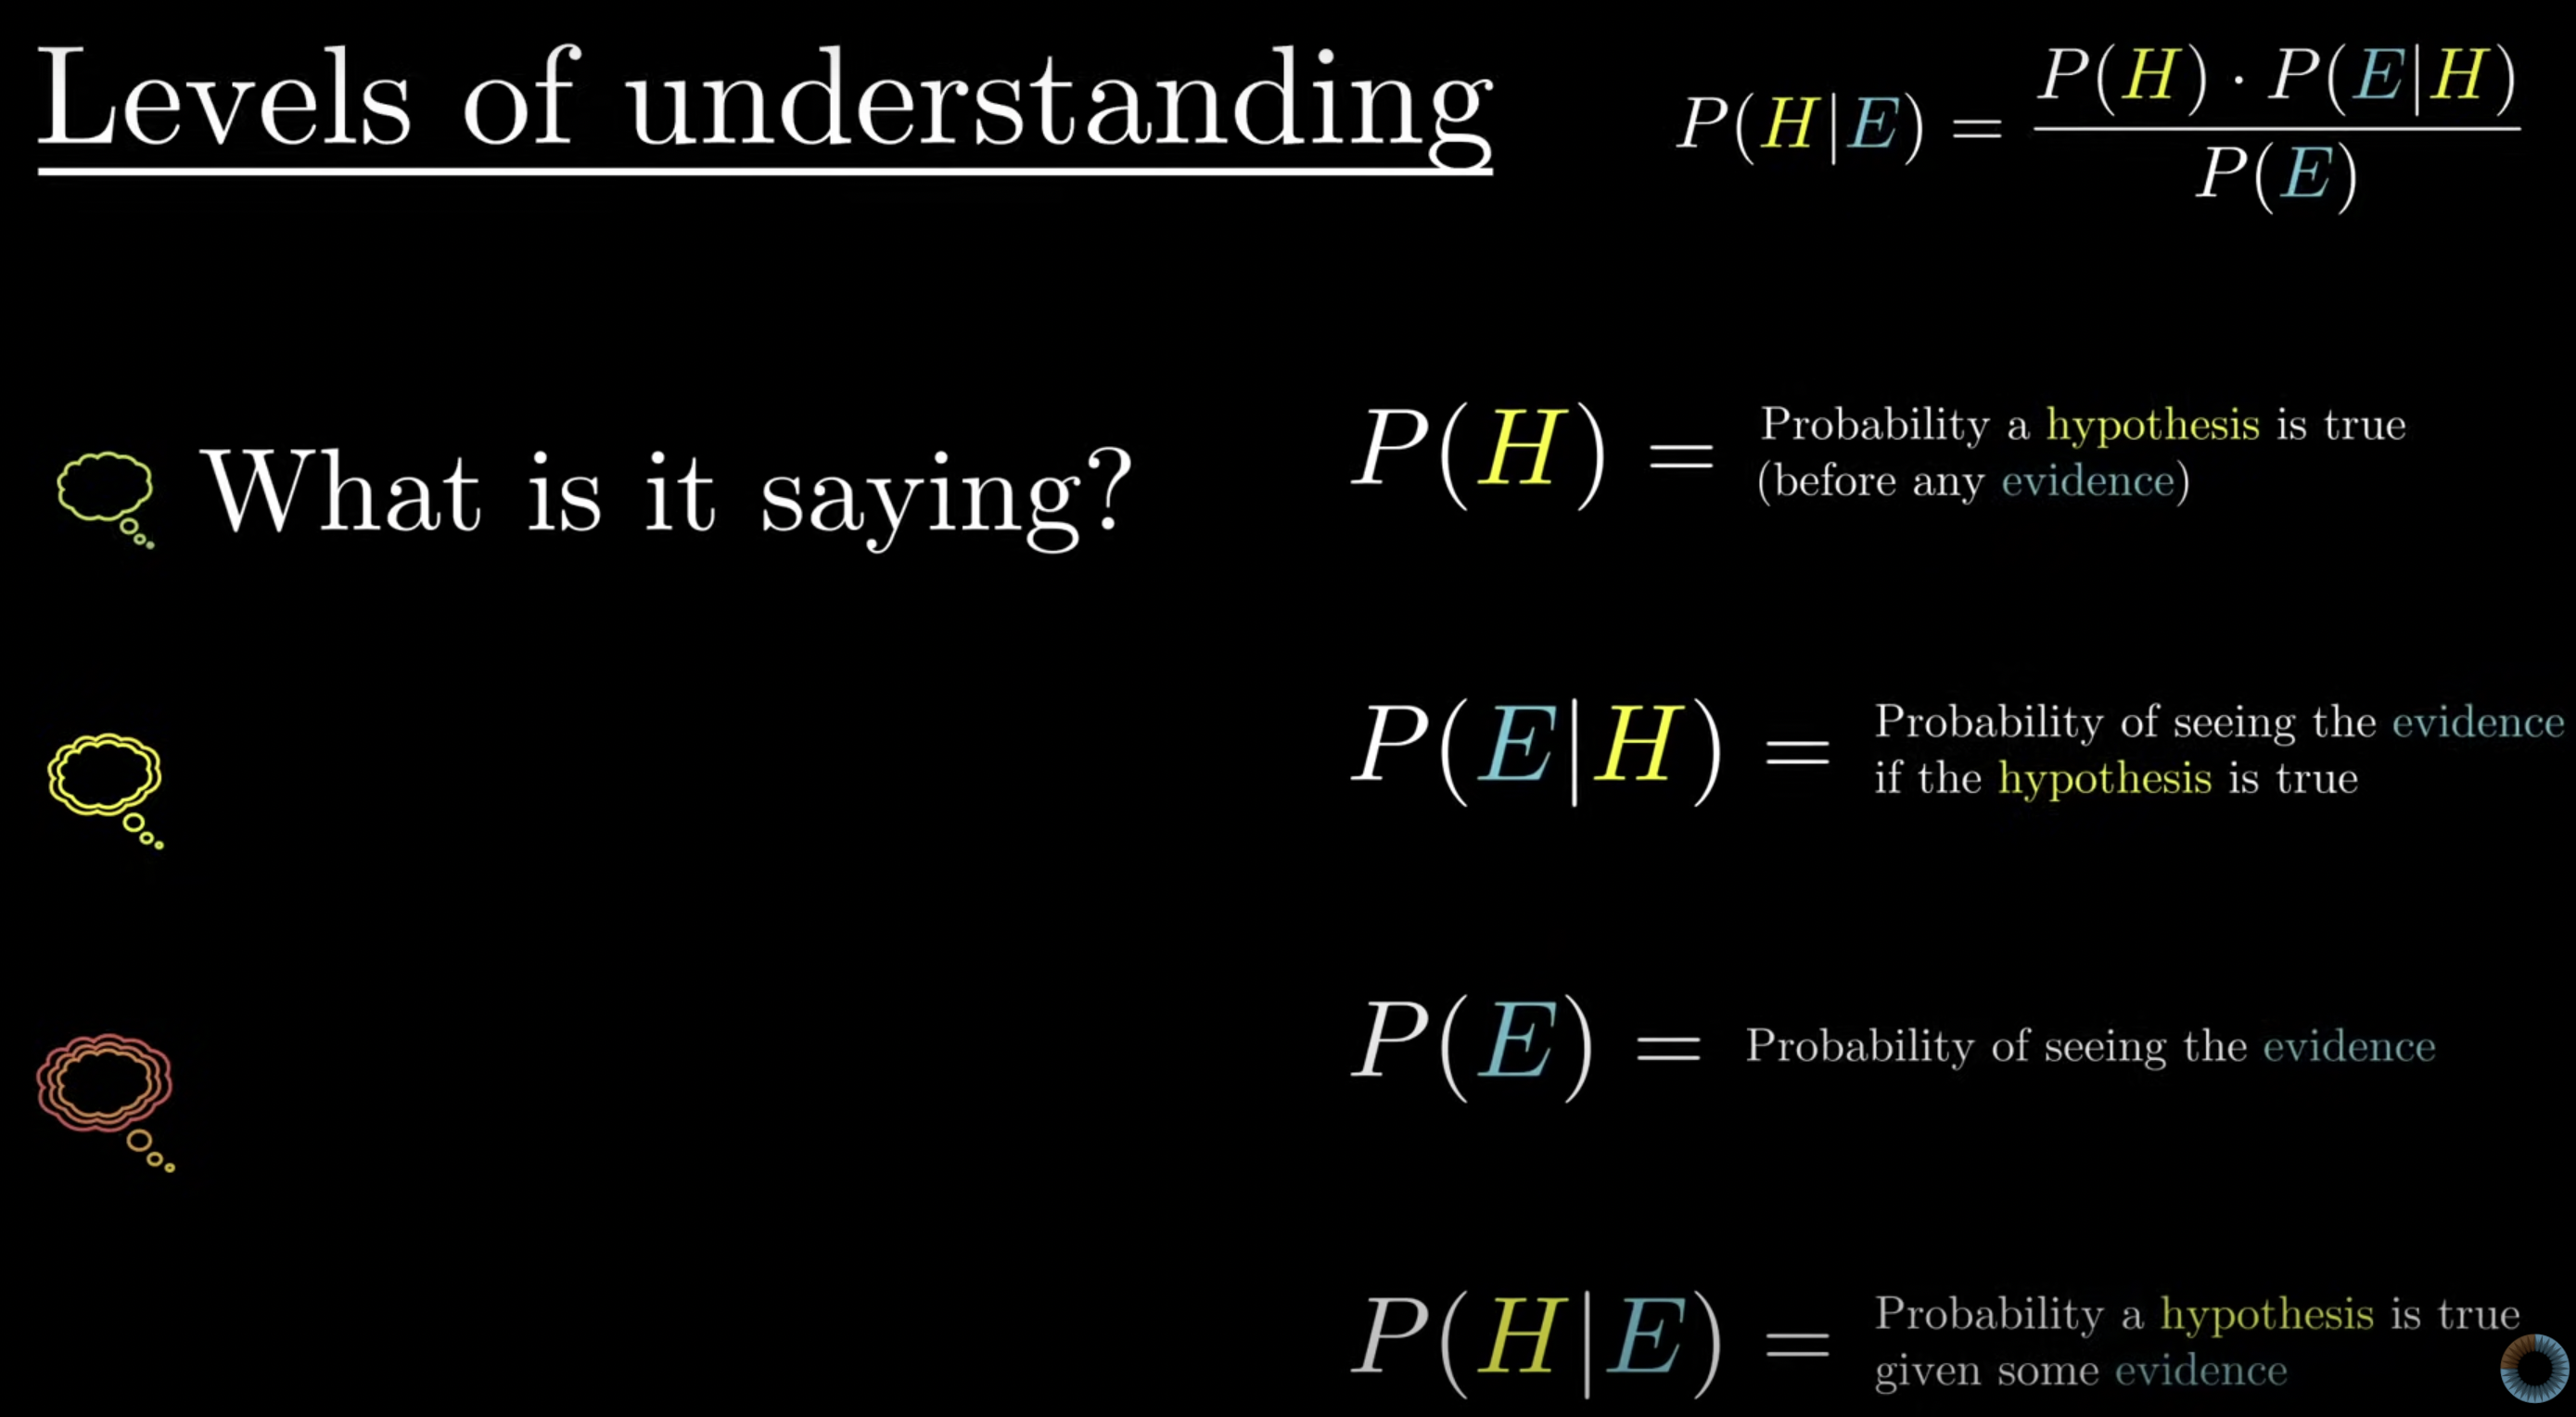

In [8]:
from IPython.display import Image
Image("/Users/rahulgarg/github/AnalyticsCourse/images/Screenshot 2021-06-04 at 8.54.36 AM.png")

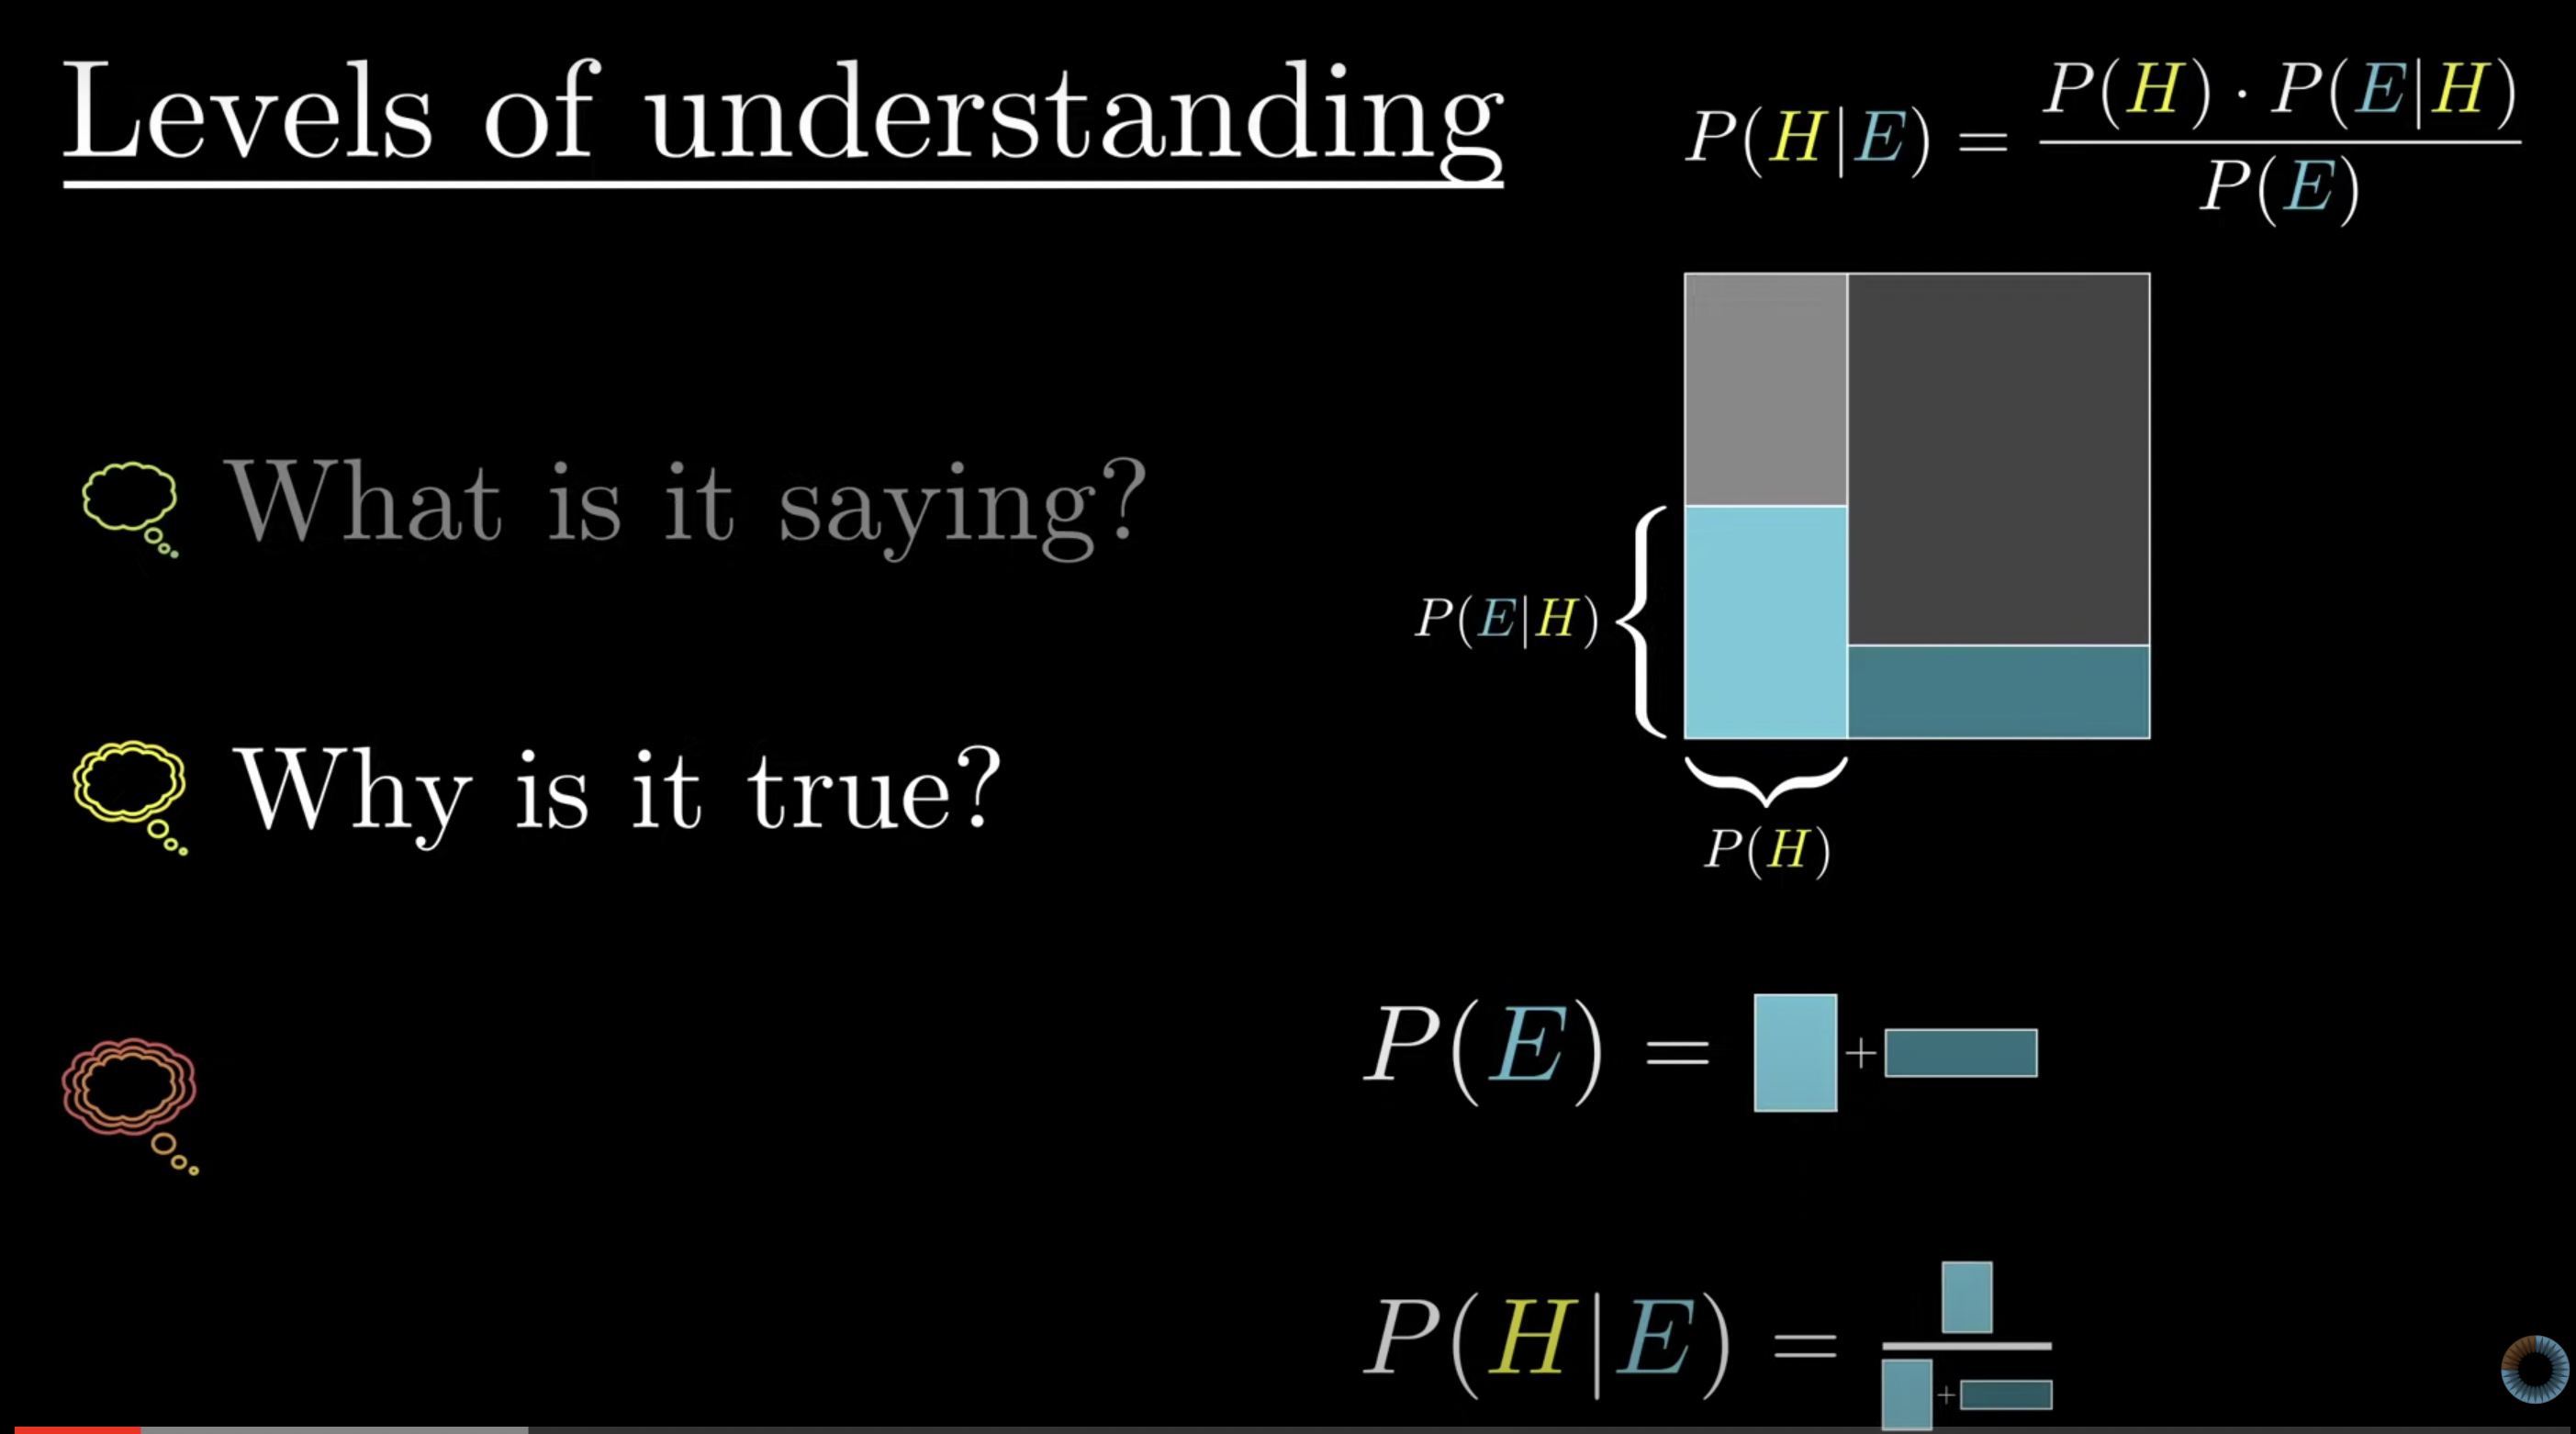

In [9]:
Image("/Users/rahulgarg/github/AnalyticsCourse/images/Screenshot 2021-06-04 at 8.55.03 AM.png")

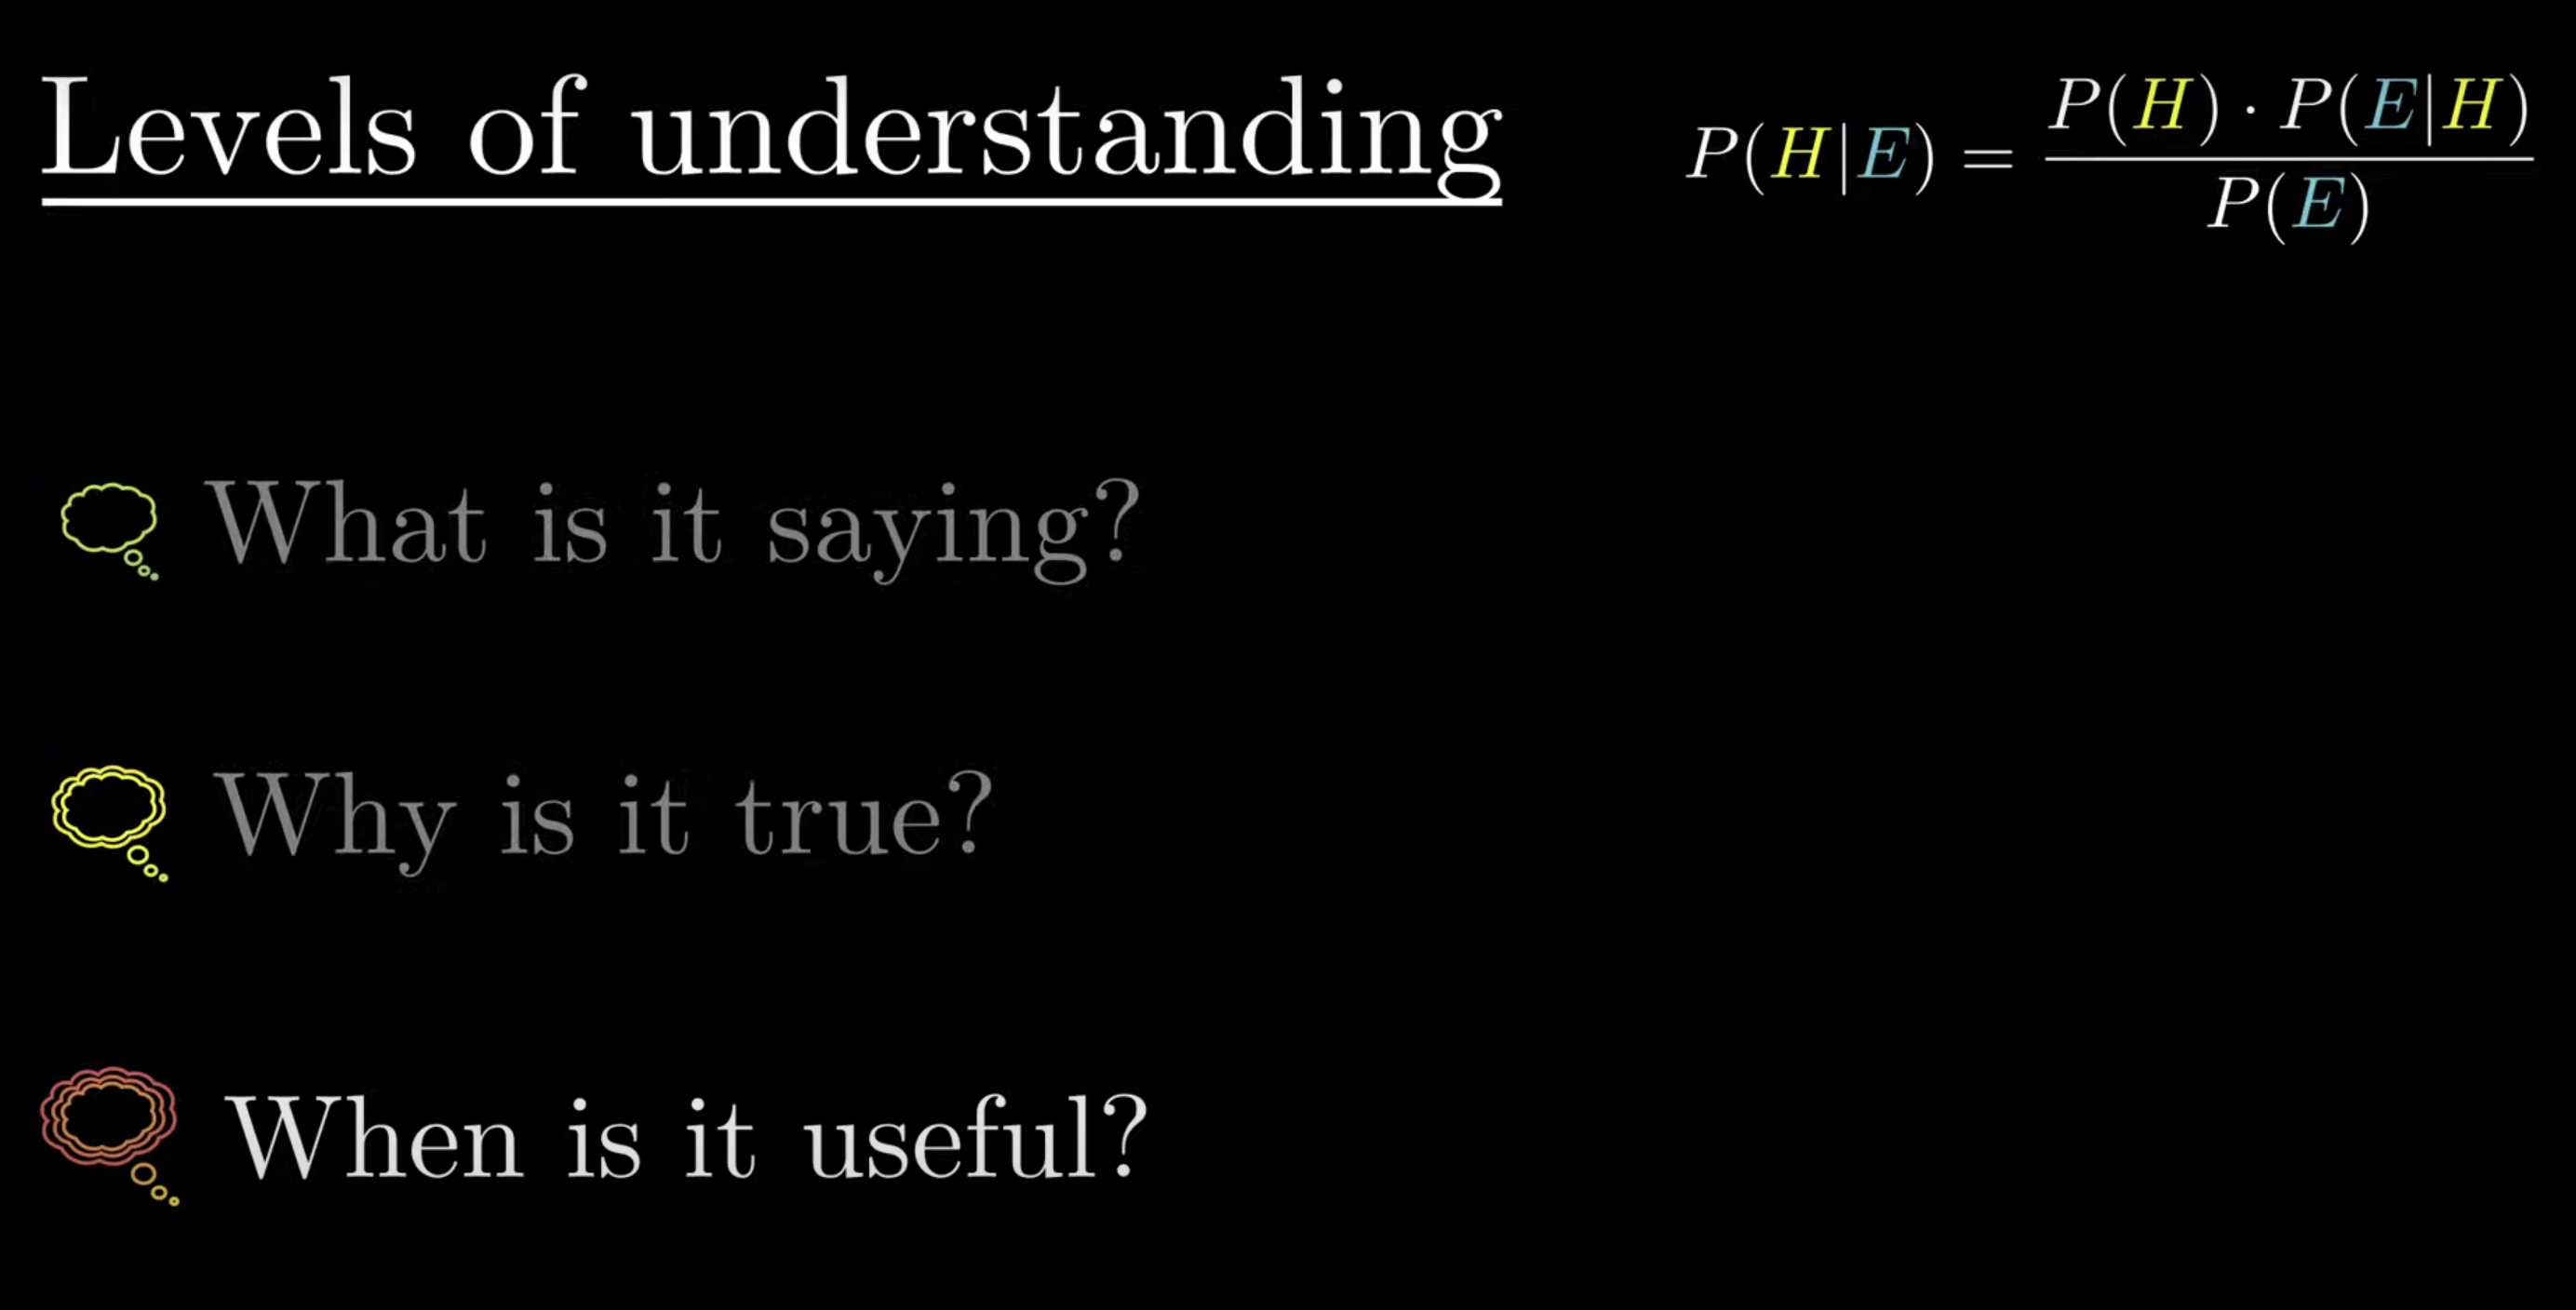

In [10]:
Image("/Users/rahulgarg/github/AnalyticsCourse/images/Screenshot 2021-06-04 at 9.00.25 AM.png")

# Where is Naive Bayes Used?

You can use Naive Bayes for the following things:

## Face Recognition
As a classifier, it is used to identify the faces or its other features, like nose, mouth, eyes, etc.

## Weather Prediction 
It can be used to predict if the weather will be good or bad.

## Medical Diagnosis 
Doctors can diagnose patients by using the information that the classifier provides. Healthcare professionals can use Naive Bayes to indicate if a patient is at high risk for certain diseases and conditions, such as heart disease, cancer, and other ailments. 

## News Classification 
With the help of a Naive Bayes classifier, Google News recognizes whether the news is political, world news, and so on. 

As the Naive Bayes Classifier has so many applications, it’s worth learning more about how it works.

In [43]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [44]:
train_df.groupby(['Sex','Embarked']).agg({'Name':'count'})

Name
Sex    Embarked      
female C           73
       Q           36
       S          203
male   C           95
       Q           41
       S          441

In [45]:
train_df.groupby(['Sex']).agg({'Name':'count'})

Name
Sex         
female   314
male     577

If male is dependent on Station S

In [48]:
P_male = 577/891
P_male

0.6475869809203143

In [51]:
P_male_given_S = 441/(441+203)
P_male_given_S

0.6847826086956522

In [50]:
P_male_given_C = 95/577
P_male_given_C

0.16464471403812825

# Naive Bayes Classifier

By assuming that the features are **conditionally independent**, we can simplify the likelihood function:

$$P(Survived \ | \ \text{sex = male,embarked = S}) \approx \frac {P(\text{male} \ | \ Survived) \times P(\text{S} \ | \ Survived) \times P(Survived)} {P(\text{sex = male})\times P(\text{embarked=S}) }$$

$$P(Not Survived \ | \ \text{sex = male,embarked = S}) \approx \frac {P(\text{male} \ | \ Not Survived) \times P(\text{S} \ | \ Not Survived) \times P(Not Survived)} {P(\text{sex = male})\times P(\text{embarked=S}) }$$

In [53]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [77]:
train_df.groupby(['Survived','Embarked' ]).agg({'Name':'count'})

Name
Survived Embarked      
0        C           75
         Q           47
         S          427
1        C           93
         Q           30
         S          217

In [76]:
LHS1 = (p_male_given_survived*p_S_given_survived*p_survived)/(p_male*p_S)
LHS1

0.16681048238751453

In [60]:
p_male_given_suv

0.31871345029239767

In [61]:
p_S_given_survived = 217/(217+93+30)
p_S_given_survived

0.638235294117647

In [63]:
p_survived= 342/891
p_survived

0.3838383838383838

In [65]:
p_male = 577/891
p_male

0.6475869809203143

In [68]:
p_S = 644/891
p_S

0.7227833894500562

In [79]:
p_male_given_not_survived = 468/(468+81)
p_S_given_not_survived = 427/ (427+75+47)
P_not_survived = 1 -p_survived

In [81]:
LHS2 = (p_male_given_not_survived*p_S_given_not_survived*P_not_survived)/(p_male *p_S)
LHS2

0.8728053650817571

# Train Naive Bayes Classifies on Titanic Dataset

In [2]:
import pandas as pd
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')

In [3]:
# Impute Missing Values
train_df['Age'] = train_df.Age.fillna(28.0)

train_df['Fare'] = train_df['Fare'].astype(int)

train_df['Embarked'] = train_df.Embarked.fillna('S')

In [4]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171     7   NaN        S  
1      0          PC 17599    71   C85        C  
2      0  STON/O2. 3101282     7   NaN        S  
3      0            113803    53  C123        S  
4      0            373450     8   NaN        S

In [85]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_gender = preprocessing.LabelEncoder() #instantiate
le_gender.fit(train_df.Sex) #Fit

LabelEncoder()

In [86]:
train_df['gender_encoded'] =le_gender.transform(train_df.Sex)

In [87]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_embarked = preprocessing.LabelEncoder() #instantiate
le_embarked.fit(train_df.Embarked) #Fit

LabelEncoder()

In [88]:
train_df['embarked_encoded'] =le_embarked.transform(train_df.Embarked)

In [89]:
train_df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket  Fare Cabin Embarked  gender_encoded  embarked_encoded  
0      0  A/5 21171     7   NaN        S               1                 2  
1      0   PC 17599    71   C85        C               0                 0

In [5]:
X = pd.DataFrame(train_df.loc[:,['Pclass','Age','Parch','Fare','Sex','Embarked' ]])
y = train_df.Survived # Step 0

In [6]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.20, random_state=20)

In [7]:
X_valid.shape

(179, 6)

In [8]:
from sklearn.naive_bayes import GaussianNB #Import
clf = GaussianNB() #Instantiate
clf.fit(X, y)

ValueError: could not convert string to float: 'male'

In [112]:
print(clf.predict(X_valid))

[0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1]


In [113]:
clf.score(X_valid, y_valid)

0.8100558659217877

In [114]:
y_pred = clf.predict(X_valid)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
pd.DataFrame(cm,columns =  ['Predicted_0','Predicted_1'], index = ['Survived_0','Survived_1'])

Predicted_0  Predicted_1
Survived_0           96           16
Survived_1           18           49

In [116]:
precision = 44/(44+14)
precision

0.7586206896551724

In [117]:
recall = 44/(44+23)
recall

0.6567164179104478

In [118]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.7040000000000001

## Predictions on test set

In [119]:
test_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/test.csv', index_col = 0)
test_df['Age'] = test_df.Age.fillna(28.0)
test_df['Fare'] = test_df['Fare'].fillna(31).astype(int)
test_df['Embarked'] = test_df.Embarked.fillna('S')

test_df['gender_encoded'] =le_gender.transform(test_df.Sex)
test_df['embarked_encoded'] =le_embarked.transform(test_df.Embarked)

X_test = pd.DataFrame(test_df.loc[:,['Pclass','Age','Parch','Fare','gender_encoded','embarked_encoded' ]])
X_test.head(2)

Pclass   Age  Parch  Fare  gender_encoded  embarked_encoded
PassengerId                                                             
892               3  34.5      0     7               1                 1
893               3  47.0      0     7               0                 2

In [121]:
test_preds = clf.predict(X_test) #predict

In [122]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [123]:
submission_df = pd.DataFrame(test_preds, index= test_df.index, columns = ['Survived'])
submission_df

Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]

In [124]:
submission_df.to_csv('/Users/rahulgarg/github/AnalyticsCourse/kaggle_submissions/titanic_submission_nb_v1.csv')

## Comparing Naive Bayes with other models

Advantages of Naive Bayes:

- It is simple and easy to implement
- It doesn’t require as much training data
- It handles both continuous and discrete data
- It is highly scalable with the number of predictors and data points
- It is fast and can be used to make real-time predictions
- It is not sensitive to irrelevant features 
- Performs better than logistic regression when the training set is very small

Disadvantages of Naive Bayes:

- Predicted probabilities are not well-calibrated
- Correlated features can be problematic (due to the independence assumption)
- Can't handle negative features (with Multinomial Naive Bayes)

# Stacking 

In [125]:
1 - Logistics Regression model
2 - Random Forest Model
3 - Naive bayes Model
on Titanic Data Set 
and I need A csv with Actuals and Predictions from these 3 models-

SyntaxError: invalid syntax (<ipython-input-125-17f58ed1d159>, line 1)